In [18]:
pip install holidays --user

  Using cached https://files.pythonhosted.org/packages/d9/c7/1d0cb8f69bb4caa252a0c95de66a34e0548cbf9d3f4a2353cba5ee5f566c/holidays-0.10.3.tar.gz
     |████████████████████████████████| 51kB 11.6MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/15/41/aa426a4a9141afd8e7f5c8312bb59d5693274f3f7b34e73bdce4ee48b4c1/korean_lunar_calendar-0.2.1-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/2c/30/47957d487fff94083bdd17247734c165f12b5ac39a3abd1aa476a93eea6e/PyMeeus-0.3.7.tar.gz
  ERROR: Complete output from command /opt/jupyterhub/anaconda/bin/python -u -c 'import setuptools, tokenize;__file__='"'"'/tmp/pip-install-25pfcmzg/holidays/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /tmp/pip-wheel-73u794zf --python-tag cp36:
  ERROR: running bdist_wheel
  using gpu 0
  Traceback (most recent call last):
    File

Failed to build holidays pymeeus
  Running setup.py install for pymeeus ... done
  Running setup.py install for holidays ... done
Note: you may need to restart the kernel to use updated packages.


In [87]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from matplotlib.dates import DateFormatter
import matplotlib.dates as dates
from sklearn.linear_model import LinearRegression
from datetime import datetime
from sklearn.metrics import mean_squared_error, r2_score
import holidays

df_postnl = pd.read_csv('/datc/parcel/notebooks/data/postnl/20201014_300_klanten.csv', parse_dates=[0])
df_postnl

,procesdag,cust_id,aantal_pakketten,aantal_pakketten_volgende_dag,validation_column
0,2015-01-02,klant_1,0,0,train
1,2015-01-02,klant_100,0,0,train
2,2015-01-02,klant_101,0,0,train
3,2015-01-02,klant_103,0,0,train
4,2015-01-02,klant_104,0,0,train
...,...,...,...,...,...
505695,2020-04-29,klant_95,68,60,test
505696,2020-04-29,klant_96,0,0,test
505697,2020-04-29,klant_97,66,123,test
505698,2020-04-29,klant_98,2035,2133,test


In [86]:
df_knmi = pd.read_csv('/datc/parcel/notebooks/data/knmi/KNMI_20200710.csv', parse_dates=[1])
df_knmi

/opt/jupyterhub/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (2,3,4,5,6,7,8,13,15,16,18,19,20,21,22,23,25,26,28,30,35,36,37,38,39,40) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,STN,YYYYMMDD,DDVEC,FHVEC,FG,FHX,FHXH,FHN,FHNH,FXX,...,VVNH,VVX,VVXH,NG,UG,UX,UXH,UN,UNH,EV24
0,260,1901-01-01,,,,,,,,,...,,,,,66,,,,,
1,260,1901-01-02,,,,,,,,,...,,,,,86,,,,,
2,260,1901-01-03,,,,,,,,,...,,,,,89,,,,,
3,260,1901-01-04,,,,,,,,,...,,,,,79,,,,,
4,260,1901-01-05,,,,,,,,,...,,,,,65,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43651,260,2020-07-06,271,44,45,60,7,20,21,130,...,3,81,11,5,71,92,24,57,12,31
43652,260,2020-07-07,271,19,25,50,10,10,1,100,...,2,82,16,7,77,99,2,52,13,31
43653,260,2020-07-08,187,6,18,30,9,10,1,60,...,24,65,11,8,94,97,22,90,11,9
43654,260,2020-07-09,230,36,38,50,5,10,1,120,...,2,70,22,8,93,98,1,87,15,8


In [88]:
#knmi data plus post nl data
df = pd.merge(df_postnl, df_knmi, how='inner', left_index=True, right_index=True)
df

,procesdag,cust_id,aantal_pakketten,aantal_pakketten_volgende_dag,validation_column,STN,YYYYMMDD,DDVEC,FHVEC,FG,...,VVNH,VVX,VVXH,NG,UG,UX,UXH,UN,UNH,EV24
0,2015-01-02,klant_1,0,0,train,260,1901-01-01,,,,...,,,,,66,,,,,
1,2015-01-02,klant_100,0,0,train,260,1901-01-02,,,,...,,,,,86,,,,,
2,2015-01-02,klant_101,0,0,train,260,1901-01-03,,,,...,,,,,89,,,,,
3,2015-01-02,klant_103,0,0,train,260,1901-01-04,,,,...,,,,,79,,,,,
4,2015-01-02,klant_104,0,0,train,260,1901-01-05,,,,...,,,,,65,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43651,2015-06-18,klant_69,144,36,train,260,2020-07-06,271,44,45,...,3,81,11,5,71,92,24,57,12,31
43652,2015-06-18,klant_7,10,3,train,260,2020-07-07,271,19,25,...,2,82,16,7,77,99,2,52,13,31
43653,2015-06-18,klant_70,0,0,train,260,2020-07-08,187,6,18,...,24,65,11,8,94,97,22,90,11,9
43654,2015-06-18,klant_71,0,0,train,260,2020-07-09,230,36,38,...,2,70,22,8,93,98,1,87,15,8


In [107]:
df_postnl_vorige_week = df_postnl.copy()
df_postnl_vorige_week['aantal_pakketten_vorige_week'] = df_postnl_vorige_week['aantal_pakketten'].shift(7)
df_postnl_vorige_week['aantal_pakketten_vorige_week'].fillna(0, inplace=True)

/opt/jupyterhub/anaconda/lib/python3.6/site-packages/pandas/core/series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [111]:
df_postnl_vorige_week.head(30)

,procesdag,cust_id,aantal_pakketten,aantal_pakketten_volgende_dag,validation_column,weekdag_0,weekdag_1,weekdag_2,weekdag_3,weekdag_4,...,maand_February,maand_January,maand_July,maand_June,maand_March,maand_May,maand_November,maand_October,maand_September,aantal_pakketten_vorige_week
59,2015-01-02,klant_165,17.0,0.0,train,0.0,0.0,0.0,0.0,1.0,...,0,1,0,0,0,0,0,0,0,NaN
319,2015-01-03,klant_165,0.0,0.0,train,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,NaN
579,2015-01-04,klant_165,0.0,56.0,train,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,NaN
839,2015-01-05,klant_165,56.0,82.0,train,1.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,NaN
1099,2015-01-06,klant_165,82.0,390.0,train,0.0,1.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,NaN
1359,2015-01-07,klant_165,390.0,32.0,train,0.0,0.0,1.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,NaN
1619,2015-01-08,klant_165,32.0,36.0,train,0.0,0.0,0.0,1.0,0.0,...,0,1,0,0,0,0,0,0,0,NaN
1879,2015-01-09,klant_165,36.0,0.0,train,0.0,0.0,0.0,0.0,1.0,...,0,1,0,0,0,0,0,0,0,17.0
2139,2015-01-10,klant_165,0.0,0.0,train,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0.0
2399,2015-01-11,klant_165,0.0,72.0,train,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0.0


In [98]:
# Select every row where cust_id is equal to "klant_165" and exclude 2020
yearfilter = df_postnl['procesdag'].dt.year != 2020
custfilter = df_postnl['cust_id'] == 'klant_165'
df_postnl = df_postnl.where(yearfilter & custfilter).dropna()

In [99]:
# Encode the day of the week and month
df_postnl.insert(loc=1, column='weekdag', value=df_postnl['procesdag'].dt.dayofweek)
df_postnl.insert(loc=2, column='maand', value=df_postnl['procesdag'].dt.month_name(locale= 'en_US.UTF.8'))
df_postnl = pd.get_dummies(df_postnl, columns=['weekdag', 'maand'])
df_postnl

,procesdag,cust_id,aantal_pakketten,aantal_pakketten_volgende_dag,validation_column,weekdag_0,weekdag_1,weekdag_2,weekdag_3,weekdag_4,...,maand_December,maand_February,maand_January,maand_July,maand_June,maand_March,maand_May,maand_November,maand_October,maand_September
59,2015-01-02,klant_165,17.0,0.0,train,0.0,0.0,0.0,0.0,1.0,...,0,0,1,0,0,0,0,0,0,0
319,2015-01-03,klant_165,0.0,0.0,train,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
579,2015-01-04,klant_165,0.0,56.0,train,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
839,2015-01-05,klant_165,56.0,82.0,train,1.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
1099,2015-01-06,klant_165,82.0,390.0,train,0.0,1.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473259,2019-12-27,klant_165,101.0,0.0,validation,0.0,0.0,0.0,0.0,1.0,...,1,0,0,0,0,0,0,0,0,0
473519,2019-12-28,klant_165,0.0,1.0,validation,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
473779,2019-12-29,klant_165,1.0,147.0,validation,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
474039,2019-12-30,klant_165,147.0,114.0,validation,1.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0


In [100]:
#Filters
train_start = df_postnl['procesdag'] >= datetime(year=2018, month=11, day=1)
train_end = df_postnl['procesdag'] <= datetime(year=2018, month=11, day=23)
test_start = df_postnl['procesdag'] >= datetime(year=2018, month=11, day=24)
test_end = df_postnl['procesdag'] <= datetime(year=2018, month=11, day=30)

# Split train and test
train = df_postnl.where(train_start & train_end).dropna()
test = df_postnl.where(test_start & test_end).dropna()

# Define X and Y train
x_train = train[['weekdag_0', 'weekdag_1', 
                 'weekdag_2', 'weekdag_3', 
                 'weekdag_4', 'weekdag_5', 
                 'weekdag_6']]
y_train = train[['aantal_pakketten']]

# Define X and Y test
x_test = test[['weekdag_0', 'weekdag_1', 
                 'weekdag_2', 'weekdag_3', 
                 'weekdag_4', 'weekdag_5', 
                 'weekdag_6']]
y_test = test[['aantal_pakketten']]

In [101]:
# Fit model
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

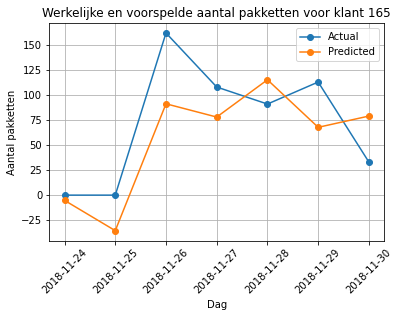

In [103]:
# Plot actual vs. predicted
fig, ax = plt.subplots()
ax.plot(test['procesdag'], y_test, label='Actual', marker='o')
ax.plot(test['procesdag'], pred, label='Predicted', marker='o')
ax.set(
    xlabel='Dag',
    ylabel='Aantal pakketten',
    title='Werkelijke en voorspelde aantal pakketten voor klant 165')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.show()

In [104]:
# Evaluate model
rmse = (np.sqrt(mean_squared_error(y_test, pred)))
r2 = r2_score(y_test, pred)

print('Root Mean Squared Error:', rmse)
print('R2 score:', r2)

Root Mean Squared Error: 41.30894057499625
R2 score: 0.4879042136207742


In [105]:
# Calculate difference
diff = y_test - pred
diff = abs(diff['aantal_pakketten'])

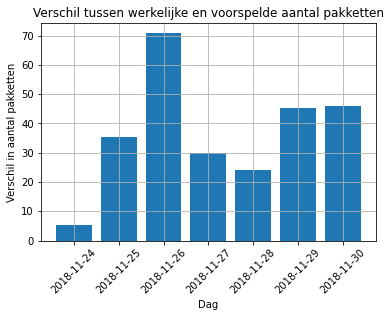

In [106]:
# Plot error
fig, ax = plt.subplots()
ax.bar(test['procesdag'], diff)
ax.set(
    xlabel='Dag',
    ylabel='Verschil in aantal pakketten',
    title='Verschil tussen werkelijke en voorspelde aantal pakketten')
plt.xticks(rotation=45)
plt.grid()
plt.show()